<a href="https://colab.research.google.com/github/GallardoCarmen/APRENDIZAJE_AUTOMATICO_23_24/blob/main/P1Grupo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **P1 AA Configuración y Entrenamiento de una Red de Neuronas_23_24**




Grupo 1

Carmen Gallardo Martín, Marta Herraiz Méndez, Pablo Mendieta Ruiz

**ENUNCIADO:**
Crea un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar
imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado,
entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

🚩EXPLICAR DE QUE VA EL PROBLEMA; OBJETIVOS Y TAL.
DECIR Q HA HECHO CADA UNO/ COMO NOS HEMOS ORGANIZADO

🚩MENCIONAR RED HOT ENCODING



## **LIBRERIAS Y FUNCIONES USADAS**

In [127]:
# Importamos todas las librerias necesarias

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from tensorflow.keras.layers import Flatten


from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt

from keras import utils
from keras.utils import to_categorical
from keras.utils import model_to_dot

import matplotlib.pyplot as plt
import numpy as np

#función para la creación de los modelos
def crear_Network (NneuronasCapa1, funcionActivacion, Optimizador, FuncionPerd):
    network = models.Sequential()

    #Agregamos la capa Flatten (explicada en el pr-procesado de datos)
    network.add(layers.Flatten(input_shape=(28, 28)))
    #Añadimos una capa densa (totalmente conectada)
    network.add(layers.Dense(NneuronasCapa1, activation=funcionActivacion, input_shape=(28*28,)))
    #capa de salida (10 posibles salidas)
    network.add(layers.Dense(10, activation='softmax'))

    keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

    # Optimizador, función de perdida y métricas
    network.compile(optimizer=Optimizador, loss=FuncionPerd,
                    metrics=['accuracy'])

    return network

#función para entrenar los modelos con los datos
#Metemos como dato de entrada las etiquetas para poder diferenciar entre las categoricas y no categoricas(PUNTO 7)
def entrenar(network, ep, labels):
  network.fit(train_images, labels, epochs = ep, batch_size=128)
  return network

#función para la evaluación
def evaluar(network, labels):
  test_loss, test_acc = network.evaluate(test_images, labels)
  print("Loss", test_loss)
  print('Accuracy', test_acc)
  return

#Funciones para graficar en el punto 6
def plot_image(i, predictions_array, true_label, img, class_names):
  pedictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  predicted_label = np.argmax(predictions_array)
  plt.imshow(img, cmap=plt.cm.binary)
  if predicted_label == true_label :
    color = 'blue'
  else :
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                     100*np.max(predictions_array),
                                     class_names[true_label]),
                                     color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## **PRE-PROCESADO DE DATOS**

Vamos a utilizar el conjunto de imagenes Fashion-MNIST


FALTA EXPLICAR DE Q VA ESTA BASE DE DATOS 🚩

Tamaño del conjunto de imagenes: 
Imagenes de entrenamiento:  (60000, 28, 28)
Imagenes de test:  (10000, 28, 28)
Imagen número 30000: 
[[  0   0   0   0   0   0   0   0   0   0 118 204 181 175 213 199 168 197 111   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 173 225 185 179 225 158 142 227 173   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 170 229 226 226 233 151 167 234 158   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 194 222 212 226 222 240 218 230 163   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 198 222 210 207 211 207 208 231 147   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188 220 209 210 211 215 208 230 144   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 214 220 212 220 213 239 158   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183 232 217 216 21

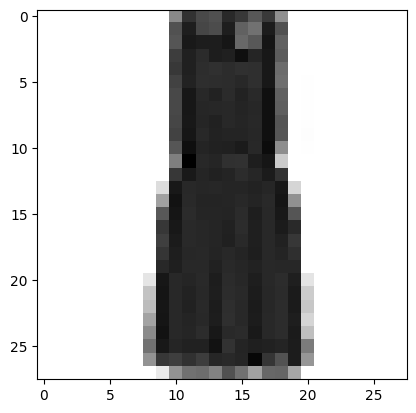

In [128]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Tamaño del conjunto de imagenes: ")
print("Imagenes de entrenamiento: ", train_images.shape)
print("Imagenes de test: ", test_images.shape)

#Vemos la matriz de la imagen número 30.000 (28x28)
print("Imagen número 30000: ")
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30000]))
# Vemos que la imagen número 30.000 corresponde al número 3(dress)
print("Etiqueta correspondiente:", train_labels[30000])

# Veamos el elemento 30000 y pintémoslo con matplotlib

digit = train_images[30000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


Ahora vamos a proceder a realizar alguna transformación en los datos para optimizar el proceso. En vez de utilizar la función reshape, vamos a aprovechar la función de keras "flatten". Como tenemos imagenes de 28x28 píxeles, con flatten vamos a transformar esas matrices en vectores unidimensionales de 784 elementos.

Por otro lado, vamos a modificar las etiquetas a tipo categorico, para que cada etiqueta sea un vector de tamaño 9, donde cada posición del 0 al 9 es la probabilidad de que esa imagen corresponda a cada una de las 9 clasificaciones. De esta manera todos vectores serán 0 con un 1 en la posición con la que equivalga la imagen.  

In [129]:
#train_images = train_images.reshape((60000, 28 * 28))
#test_images = test_images.reshape((10000, 28 * 28))

#Preparación de etiquetas
print("Etiquetas originales: ")
print(train_labels)

train_labels_Cat = to_categorical(train_labels)
test_labels_Cat = to_categorical(test_labels)
# Posición 0 a 9 donde solo la 3 tiene probabilidad 1.
# la imagen 30000 de entrenamiento es 3 (dress)

print("=Etiquetas tas la función to_categorical:")
print(test_labels)


Etiquetas originales: 
[9 0 0 ... 3 0 5]
=Etiquetas tas la función to_categorical:
[9 2 1 ... 8 1 5]


Por último vamos a normalizar los datos para tratar de obtener una convergencia más rápida. Como nuestros datos se tratan de imagenes con una escala de grises y el valor máximo es 255 de los pixeles, dividimos por 255 para poder obtener unos datos que vayan del 0 al 1.

In [130]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

## **CONSTRUCCIÓN DE LA RNA**

### **PUNTO 1**
Configuración y entrenamiento de los siguientes modelos de red de neuronas, todos con función de pérdida ‘categorical_crossentropy’, métrica de precisión y 5 épocas, analizando y reflexionando sobre los resultados

🚩POR ALGUNA LADO HAY Q EXPLICAR COSAS TEORICAS, COMO Q ES UNA FUNCION DE ACTIVACION O Q ES UNA EPCOCA

In [131]:

NNeuronasC1 = [10, 10, 10, 10, 512, 512, 512, 512 ]
Fa = ["relu" , "relu", "sigmoid", "sigmoid","relu" , "relu", "sigmoid", "sigmoid" ]
optimizador = ["sgd", "rmsprop", "sgd", "rmsprop","sgd", "rmsprop","sgd", "rmsprop"]

network = [0]*8
for i in range (8):
  print("Modelo", i+1)
  modelo = crear_Network (NNeuronasC1[i], Fa[i], optimizador[i],'categorical_crossentropy')
  modelo = entrenar(modelo, 5, train_labels_Cat)
  network[i] = modelo
  print("\n")




Modelo 1
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 1.4905 - accuracy: 0.5047
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.9174 - accuracy: 0.7106
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7673 - accuracy: 0.7534
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6870 - accuracy: 0.7756
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6349 - accuracy: 0.7886


Modelo 2
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.9492 - accuracy: 0.6978
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5586 - accuracy: 0.8128
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5016 - accuracy: 0.8294
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4752 - accuracy: 0.8357
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4577 - accurac

**caso 1**

*10 neuronas, función de activación: relu, optimizador: rmsprop*

La primera capa tiene 7850 parámetros entrenables y la segunda 110. Durante las 5 épocas se entrena el modelo y se actualizan los pesos, podemos ver la evolución con 'loss' y 'accuracy'

Con la primera época conseguimos una precisión de 0.45 y una pérdida de 1.5 aproximadamente. Lo ideal es que la pérdida disminuya a medida que la precisión aumenta. Esto sucede en este caso, ya que, en la época 5 conseguimos una precisión de 0.79 y una pérdida de 0.6. Con ReLu la función se actualiza de tal forma que si la salida es positiva toma el valor de la salida abierta y si es negativa el 0.

**caso 2**

*10 neuronas, función de activación: relu, optimizador: sgd*

Igual que el anterior, tenemos 7960 parámetros entrenables.
La pérdida disminuye y la precisión aumenta con cada época. Esto sugiere que el modelo está aprendiendo y mejorando en el conjunto de datos de entrenamiento.
La precisión inicial es de 0.7 y al final del entrenamiento alcanza alrededor del 0.85 disminuyendo la pérdida a 0.44.

Al igual que el primer modelo, se observa una mejora significativa en la precisión y la pérdida durante el entrenamiento.

Al comparar ambos modelos, parece que el segundo modelo alcanza una precisión ligeramente mayor ya que la precisión final es mayor y la pérdida final menor. Lo que cambia del caso 1 es el optimizador, en este caso se utiliza el descenso de gradiente estocástico, consiste en utilizar la información sobre cuánto se equivoca el sistema en función de los datos que se esperan.

**caso 3**

*10 neuronas, función de activación: sigmoid, optimizador: sgd*

Igual que el anterior, tenemos 7960 parámetros entrenables.

Debido al alto valor de pérdida inicial y bajo valor de precisión podemos confirmar que la función de activación da unos valores más lejanos que la relu al principio. Pero se ajusta rápido ya que en 5 épocas disminuye a 1 la pérdida partiendo de 2. La precisión obtenida final es 0.6.

La función de activación que se utiliza otorga los valores 0 o 1 a la salida abierta, esta función tiene el problema de que durante el entrenamiento se pueden volver los gradientes muy pequeños a medida que los actualizamos, lo que lleva a que los pesos se actualicen más lento. Por ello, los resultados son un poco peores que en los casos anteriores. En cuanto al optimizador usamos sgd, el mismo que en el caso anterior, un descenso de gradiente estocástico, el estocástico quiere decir que se utiliza un subconjunto aleatorio de los datos en cada paso para calcular el gradiente y actualizar los pesos.


**caso 4**

*10 neuronas, función de activación: sigmoid, optimizador: rmsprop*

Al final del entrenamiento, la pérdida es de aproximadamente 0.5 y la precisión es del 0.83. Habiendo empezado con una pérdidad de 1.4 ha disminuido igual que el anterior. La precisión ya empezó siendo más o menos alta, por lo que el aumento no es tan significativo como en los casos anteriores.

Se utiliza la misma función de activación que en el caso 3, pero con el optimizador rmsprop, que adapta la tasa de aprendizaje para cada parámetro de manera individual, lo que puede ser beneficioso para converger de manera más efectiva.


**caso 5**

*512 neuronas, función de activación: relu, optimizador: sgd*

En este caso utilizamos 512 neuronas en vez de 10, lo cual crea una red neuronal más compleja. Esto puede tener beneficios como resolver problemas más complejos, pero puede aumentar considerablemente el tiepmo de ejecución al complicar mucho el sistema.

Comprobamos que la pérdida disminuye a la mitad aproximadamente, entre la primera y la quinta época. En cuanto a la precisión, igual que en el caso anterior esta en 0.83 al final. Luego, este caso es bastante parecido al anterior en cuanto a resultados. La función de activación cambia pero tanto relu como sigmoid producen un desvanecimiento del gradiente, luego que salgan resultados parecidos tiene sentido, ambas tienden a hacer lo mismo.


**caso 6**

*512 neuronas, función de activación: relu, optimizador: rmsprop*


Podemos observar una pérdida de inicio de 0.5 aproximadamente y la precisión es alta, de 0.8, esta aumenta poco, ya que partía de un punto bastante alto, alcanzando 0.9. Lo que mejora es la pérdida que se disminuye a 0.3 aproximadamente. Lo que cambia de este caso al anterior es el optimizador, las diferencias son las mismas comentadas en los casos de 10 neuronas


**caso 7**

*512 neuronas, función de activación: sigmoid, optimizador: sgd*

El caso 7 comienza con una precisión muy baja y una pérdida muy alta. Pero, logra alcanzar una precisión casi de 0.8, lo cual es buen resultado contando, aumenta más que en el caso 4 o 5, donde si se aumenta la precisión, pero no de forma tan significativa. En cuanto a la pérdida también se consiguen buenos resultados disminuyendo de 1.7 a 0.7.


**caso 8**

*512 neuronas, función de activación: sigmoid, optimizador: rmsprop*

En el caso 8 podemos ver que tiene una pérdida inicial de 0.61 y termina con la mitad, lo cual es un buen resultado. En cuanto a la precisión sube de 0.78 a 0.87, no aumenta igual que disminuye la pérdida.

Es relevante mencionar que los resultados de estos casos son no deterministas, ya que varían cada vez que se ejecuta el programa.













### **PUNTO 2**
Explicación de la salida de la llamada model.summary() de cada uno de los 8 casos

In [132]:
for i in range (8):
  network[i].summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_44 (Flatten)        (None, 784)               0         
                                                                 
 dense_88 (Dense)            (None, 10)                7850      
                                                                 
 dense_89 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_45 (Flatten)        (None, 784)               0         
                                                                 
 dense_90 (Dense)           

**Model Summary**


Llamnado *X* y *N* a las **unidades de las capas**, podemos decir que la primera capa, tiene *X* unidades. Esto significa que la capa toma la entrada de datos y la transforma en un vector de *X* dimensiones. La segunda capa, tiene *N* unidades. La capa toma el vector de *X* dimensiones y lo transforma en un vector de *N* dimensiones.

Dependiendo del las unidades de las capas el número total de parametros del modelo se calcula de la forma que viene explicada más adelante. Ese número son la cantidad de pesos que debe aprender el modelo durante el entrenamiento.

🚩PODEMOS PONER caso 1-4 (10 neuronas) y caso 5-8 (512)? PORQUE SE REPITEN

**Caso 1 :**

 7.850 = 784 x 10 + 10 Sesgo

 110 = 10x10 + 10 Sesgo

 7.960 = 7.850 + 110

**caso 2 :**

 7.850 = 784 x 10 + 10 Sesgo

 110 = 10x10 + 10 Sesgo

 7.960 = 7.850 + 110


**caso 3 :**

 7.850 = 784 x 10 + 10 Sesgo

 110 = 10x10 + 10 Sesgo

 7.960 = 7.850 + 110


**caso 4 :**

 7.850 = 784 x 10 + 10 Sesgo

 110 = 10x10 + 10 Sesgo

 7.960 = 7.850 + 110

**caso 5 :**

 401.920 = 784 x 512 + 512 Sesgo

 5.130 = 512x10 + 10 Sesgo

 407.050 = 401.920 + 5.130

**caso 6 :**

 401.920 = 784 x 512 + 512 Sesgo

 5.130 = 512x10 + 10 Sesgo

 407.050 = 401.920 + 5.130

**caso 7 :**

 401.920 = 784 x 512 + 512 Sesgo

 5.130 = 512x10 + 10 Sesgo

 407.050 = 401.920 + 5.130

**caso 8 :**

 401.920 = 784 x 512 + 512 Sesgo

 5.130 = 512x10 + 10 Sesgo

 407.050 = 401.920 + 5.130

### **PUNTO 3**

Analisis e interpretación los resultados del caso 2 y el 7 frente a sus originales si se
multiplica por 5 las épocas de entrenamiento


In [133]:
modelo2MOD = crear_Network (10, 'relu', 'rmsprop', 'categorical_crossentropy')
modelo2MOD = entrenar(modelo2MOD, 25, train_labels_Cat)
evaluar(modelo2MOD, test_labels_Cat)

Epoch 1/25
469/469 [==============================] - 3s 5ms/step - loss: 0.8076 - accuracy: 0.7410
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 0.5145 - accuracy: 0.8250
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4694 - accuracy: 0.8391
Epoch 4/25
469/469 [==============================] - 2s 4ms/step - loss: 0.4474 - accuracy: 0.8457
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.8507
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4237 - accuracy: 0.8535
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4154 - accuracy: 0.8551
Epoch 8/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4092 - accuracy: 0.8577
Epoch 9/25
469/469 [==============================] - 2s 3ms/step - loss: 0.4041 - accuracy: 0.8592
Epoch 10/25
469/469 [==============================] - 2s 5ms/step - loss: 0.3991 - accuracy: 0.8612

**Caso 2:**

si lo realizamos con 5 épocas (recorre las imágenes 5 veces por todo el conjunto de datos de entrenamiento, ajustando sus pesos en cada iteración para mejorar su capacidad de hacer predicciones) termina con una pérdida de 0.5 y una precisión de 0.8 aproximadamente. Aumentando las épocas a 25 resulta una pérdida de 0.36 aproximadamente por lo que se disminuye la pérdida. En cuanto a la precisión con 25 aumenta a 0.87, no es tan significativo el aumento, contando con que estamos multiplicando las veces que pasa por todas las imágenes por 5.

Podríamos pensar que estamos sobre entrenando al sistema al pedirle que realice 25 iteraciones completas, podría coger patrones incorrectos. Pero, evaluando comprobamos que la precisión es de 0.8 y la pérdida de 88.9, al ser datos peores que en el entrenamiento comprobamos que el sistema no esta sobre entrenado.

In [134]:
#crearia una variable modelo2MOD y creamos de 0 el network
modelo7MOD = crear_Network (512, 'sigmoid', 'sgd','categorical_crossentropy')
modelo7MOD = entrenar(modelo7MOD, 25, train_labels_Cat)
evaluar(modelo7MOD, test_labels_Cat)

Epoch 1/25
469/469 [==============================] - 5s 9ms/step - loss: 1.7019 - accuracy: 0.6047
Epoch 2/25
469/469 [==============================] - 4s 8ms/step - loss: 1.1296 - accuracy: 0.7147
Epoch 3/25
469/469 [==============================] - 6s 12ms/step - loss: 0.9255 - accuracy: 0.7319
Epoch 4/25
469/469 [==============================] - 6s 12ms/step - loss: 0.8241 - accuracy: 0.7446
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7629 - accuracy: 0.7531
Epoch 6/25
469/469 [==============================] - 5s 11ms/step - loss: 0.7210 - accuracy: 0.7611
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.6899 - accuracy: 0.7670
Epoch 8/25
469/469 [==============================] - 5s 10ms/step - loss: 0.6656 - accuracy: 0.7729
Epoch 9/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6455 - accuracy: 0.7785
Epoch 10/25
469/469 [==============================] - 6s 13ms/step - loss: 0.6287 - accuracy: 

Caso 7:


Con 5 épocas el caso 7 tiene una precisión más baja que con 25, ya que con 5 tiene 0.75 y con 25 0.82, sube, aunque no de forma muy significativa. En cuanto a la pérdida observamos que con 5 épocas es aproximadamente de 0.7 y con 25 de 0.5. Con 25 épocas la precisión y la pérdida se actualizan más o menos en la misma medida, ya que tenemos una pérdidad de 0.5 y una precisión de 0.82 aprox. Este resultado es bastante mejor que el de 5 épocas. Además, al evaluar el sistema no está sobre entrenado. Ya que muestra una precisión de 0.7 en las pruebas, un poco inferior a la del entrenamiento.

### **PUNTO 4**

Evaluación de cada uno de los 8 modelos comparando el rendimiento del modelo en el conjunto de datos de prueba


In [135]:
for i in range (8):
  print("Modelo: ", i+1)
  evaluar(network[i], test_labels_Cat)

Modelo:  1
313/313 [==============================] - 1s 2ms/step - loss: 0.6422 - accuracy: 0.7825
Loss 0.6422433853149414
Accuracy 0.7825000286102295
Modelo:  2
313/313 [==============================] - 1s 2ms/step - loss: 0.4888 - accuracy: 0.8280
Loss 0.4888247549533844
Accuracy 0.828000009059906
Modelo:  3
313/313 [==============================] - 1s 2ms/step - loss: 1.3364 - accuracy: 0.6526
Loss 1.336449146270752
Accuracy 0.6525999903678894
Modelo:  4
313/313 [==============================] - 1s 2ms/step - loss: 0.5171 - accuracy: 0.8243
Loss 0.5170527696609497
Accuracy 0.8242999911308289
Modelo:  5
313/313 [==============================] - 1s 3ms/step - loss: 0.5293 - accuracy: 0.8187
Loss 0.5292518138885498
Accuracy 0.8187000155448914
Modelo:  6
313/313 [==============================] - 1s 4ms/step - loss: 0.3520 - accuracy: 0.8733
Loss 0.3519626259803772
Accuracy 0.8733000159263611
Modelo:  7
313/313 [==============================] - 2s 5ms/step - loss: 0.7497 - accurac

**CASO 1:**

**Datos del conjuto de entrenamiento:**
loss: 0.5831 - accuracy: 0.8008

**Datos del conjunto de prueba:**
loss: 0.5942 - accuracy: 0.7934

Estos datos indican que el modelo está generalizando bien a datos nuevos. La pérdida del conjunto de prueba es similar a la pérdida del conjunto de entrenamiento, lo que significa que el modelo está haciendo predicciones que están cerca de las etiquetas correctas en ambos conjuntos de datos. La precisión es ligeramente menor que la precisión del conjunto de entrenamiento, pero sigue siendo alta, lo que significa que el modelo está prediciendo correctamente las etiquetas del 79.34% de los datos de prueba.

**CASO 2:**

**Datos del conjuto de entrenamiento:**
loss: 0.4358 - accuracy: 0.8497

**Datos del conjunto de prueba:**
loss: 0.4760 - accuracy: 0.8324

Estos datos indican que el modelo está generalizando bien a datos nuevos. La pérdida es ligeramente mayor que la pérdida del conjunto de entrenamiento, pero sigue siendo baja, lo que significa que el modelo está haciendo predicciones que están cerca de las etiquetas correctas en ambos conjuntos de datos. La precisión es ligeramente menor que la precisión del conjunto de entrenamiento, pero sigue siendo alta, lo que significa que el modelo está prediciendo correctamente las etiquetas del 83.24% de los datos de prueba.


**CASO 3:**

**Datos del conjuto de entrenamiento:**
loss: 1.3353 - accuracy: 0.6631

**Datos del conjunto de prueba:**
loss: 1.2788 - accuracy: 0.6821

Estos datos indican que el modelo está generalizando bien a datos nuevos. La pérdida es ligeramente menor que la pérdida del conjunto de entrenamiento, lo que significa que el modelo está haciendo predicciones que están más cerca de las etiquetas correctas en ambos conjuntos de datos. La precisión es ligeramente mayor que la precisión del conjunto de entrenamiento, lo que significa que el modelo está prediciendo correctamente las etiquetas del 68.21% de los datos de prueba.


**CASO 4:**

**Datos del conjuto de entrenamiento:**
loss: 0.5067 - accuracy: 0.8319

**Datos del conjunto de prueba:**
loss: 0.5209 - accuracy: 0.8238

Estos datos indican que el modelo está generalizando bien a datos nuevos. La pérdida es ligeramente mayor que la pérdida del conjunto de entrenamiento, pero sigue siendo baja, lo que significa que el modelo está haciendo predicciones que están cerca de las etiquetas correctas en ambos conjuntos de datos. La precisión es ligeramente menor que la precisión del conjunto de entrenamiento, pero sigue siendo alta, lo que significa que el modelo está prediciendo correctamente las etiquetas del 82.38% de los datos de prueba.


**CASO 5:**

**Datos del conjuto de entrenamiento:**
loss: 0.5095 - accuracy: 0.8310

**Datos del conjunto de prueba:**
loss: 0.5227 - accuracy: 0.8233

Estos datos indican que el modelo está generalizando bien a datos nuevos. La pérdida es ligeramente mayor que la pérdida del conjunto de entrenamiento, pero sigue siendo baja, lo que significa que el modelo está haciendo predicciones que están cerca de las etiquetas correctas en ambos conjuntos de datos. La precisión es ligeramente menor que la precisión del conjunto de entrenamiento, pero sigue siendo alta, lo que significa que el modelo está prediciendo correctamente las etiquetas del 82.33% de los datos de prueba.

**CASO 6:**

**Datos del conjuto de entrenamiento:**
loss: 0.2953 - accuracy: 0.8917

**Datos del conjunto de prueba:**
loss: 0.3400 - accuracy: 0.8788

Estos datos indican que el modelo está generalizando bien a datos nuevos. La pérdida es ligeramente mayor que la pérdida del conjunto de entrenamiento, pero sigue siendo baja, lo que significa que el modelo está haciendo predicciones que están cerca de las etiquetas correctas en ambos conjuntos de datos. La precisión es ligeramente menor que la precisión del conjunto de entrenamiento, pero sigue siendo muy alta, lo que significa que el modelo está prediciendo correctamente las etiquetas del 87.88% de los datos de prueba.


**CASO 7:**

**Datos del conjuto de entrenamiento:**
loss: 0.7643 - accuracy: 0.7510

**Datos del conjunto de prueba:**
loss: 0.7540 - accuracy: 0.7487

Estos datos indican que el modelo está generalizando bien a datos nuevos. La pérdida es ligeramente menor que la pérdida del conjunto de entrenamiento, lo que significa que el modelo está haciendo predicciones que están más cerca de las etiquetas correctas en ambos conjuntos de datos. La precisión es ligeramente menor que la precisión del conjunto de entrenamiento, pero sigue siendo media, lo que significa que el modelo está prediciendo correctamente las etiquetas del 74.87% de los datos de prueb


**CASO 8:**

**Datos del conjuto de entrenamiento:**
loss: 0.3664 - accuracy: 0.8659

**Datos del conjunto de prueba:**
loss: 0.3911 - accuracy: 0.8589

Estos datos indican que el modelo está generalizando bien a datos nuevos. La pérdida es ligeramente mayor que la pérdida del conjunto de entrenamiento, pero sigue siendo baja, lo que significa que el modelo está haciendo predicciones que están cerca de las etiquetas correctas en ambos conjuntos de datos. La precisión es ligeramente menor que la precisión del conjunto de entrenamiento, pero sigue siendo alta, lo que significa que el modelo está prediciendo correctamente las etiquetas del 85.89% de los datos de prueba.


### **PUNTO 5**

Uso de cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de test (test_images[5]).
Primero vamos a analizar cual es la test_images[5] para hacernos una idea de cual es el resultado y si nuestros modelos son lo suficientemente fiables.Por otro lado, vamos a crear una variable con los nombres de las prendas para entender mejor los reusltados.


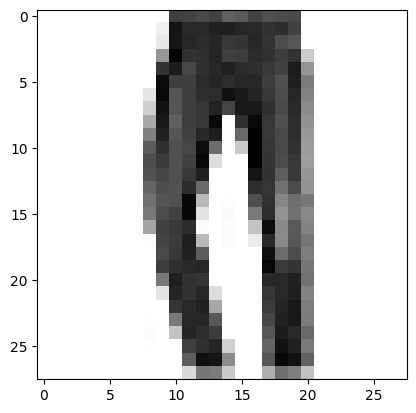

Etiqueta: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Que equivale a la prenda:  T-shirt/Top


In [136]:
#mostramos la imagen que nos interesa
prueba = test_images[5].reshape(28,28)
plt.imshow(prueba, cmap=plt.cm.binary)
plt.show()
print("Etiqueta:",test_labels_Cat[5])

clasific = ["T-shirt/Top","Trouser", "Pullover", "Dress", "Coat", "Sandal","Shirt", "Sneaker","Bag", "Ankle Boot"]
print("Que equivale a la prenda: ", clasific[np.argmax(test_labels[5])])


Calculamos las prediciones de la sexta imagen con los 8 modelos y observamos que todos ellos aciertan. Cabe destacar que algunos modelos tienes peores prediciones que otros, como es el caso del tercero. También calculamos la suma de todos los elementos del vector de prediciones y observamos que es 1 en todos los casos (Esto se debe a que estamos trabajando con probabilidades)

In [137]:
all_predictions = []
for i in range(8):
    print("MODELO:", i+1)

    # Hacemos las predicciones con las imágenes de Test
    predictions = network[i].predict(test_images)

    print("PREDICCIÓN OBTENIDA: " )
    print(predictions[5])
    print("SUMA DEL VECTOR: ", np.sum(predictions[5]) )
    print("Prenda obtenida: ",clasific[np.argmax(predictions[5])])
    print("\n")
    all_predictions.append(predictions)
    #explicar poruqe tiene q dar 1(PRobabilidad) y poner si el maximo coincide con la label
    #crear tambien un vector con los nombre de las prendas

MODELO: 1
313/313 [==============================] - 1s 2ms/step
PREDICCIÓN OBTENIDA: 
[0.01 0.95 0.   0.01 0.03 0.   0.01 0.   0.   0.  ]
SUMA DEL VECTOR:  1.0
Prenda obtenida:  Trouser


MODELO: 2
313/313 [==============================] - 1s 2ms/step
PREDICCIÓN OBTENIDA: 
[0.   0.98 0.01 0.   0.   0.   0.   0.   0.   0.  ]
SUMA DEL VECTOR:  1.0000001
Prenda obtenida:  Trouser


MODELO: 3
313/313 [==============================] - 1s 1ms/step
PREDICCIÓN OBTENIDA: 
[0.11 0.43 0.06 0.14 0.13 0.02 0.07 0.02 0.01 0.01]
SUMA DEL VECTOR:  1.0000001
Prenda obtenida:  Trouser


MODELO: 4
313/313 [==============================] - 1s 1ms/step
PREDICCIÓN OBTENIDA: 
[0.   0.96 0.   0.01 0.02 0.   0.01 0.   0.   0.  ]
SUMA DEL VECTOR:  1.0
Prenda obtenida:  Trouser


MODELO: 5
313/313 [==============================] - 1s 3ms/step
PREDICCIÓN OBTENIDA: 
[0.   0.97 0.   0.   0.02 0.   0.   0.   0.   0.  ]
SUMA DEL VECTOR:  0.9999999
Prenda obtenida:  Trouser


MODELO: 6
313/313 [==================

### **PUNTO 6**
Uso de las funciones proprocionadas para graficar cómo de bien o de mal se comporta el modelo para cada uno de los 8 casos

Modelo: 1


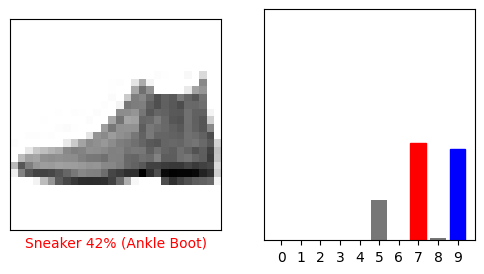

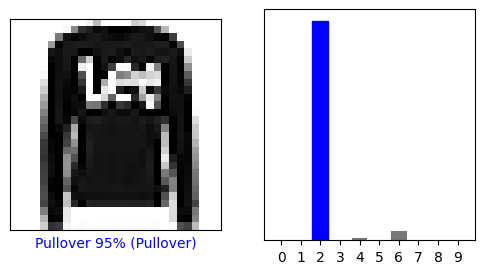

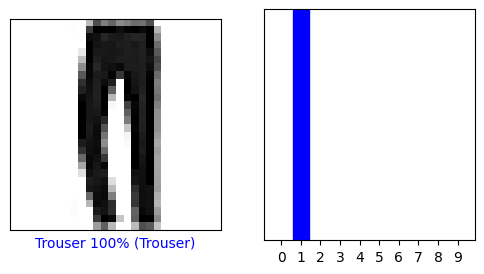

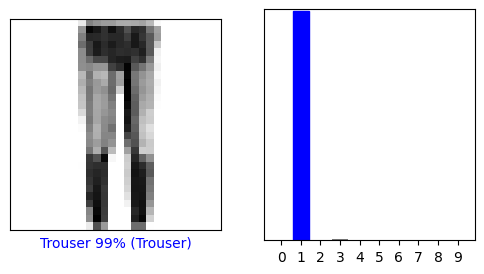

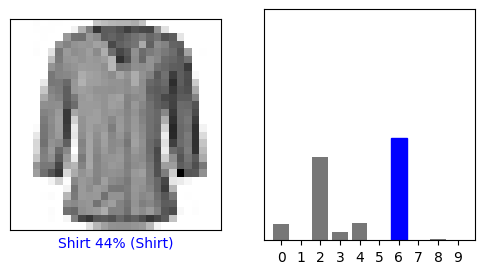

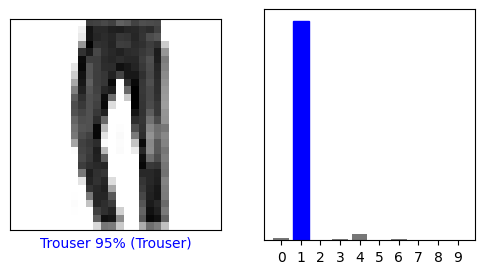

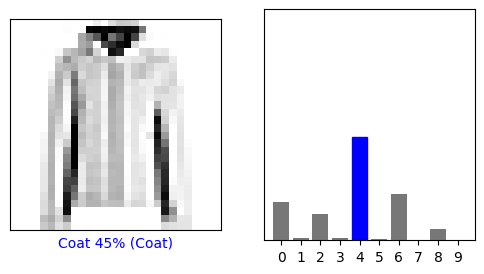

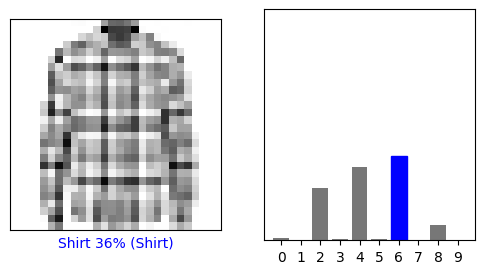

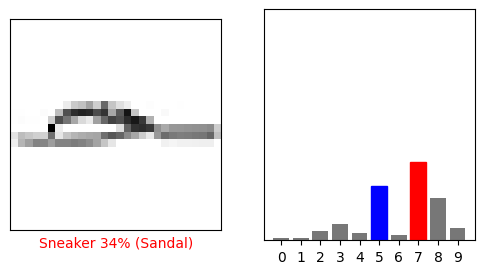

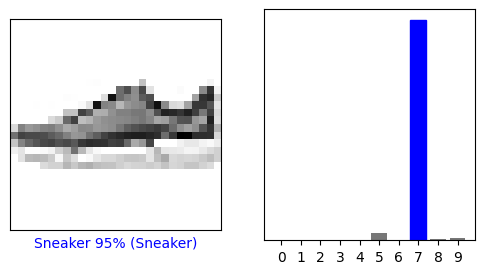

Modelo: 2


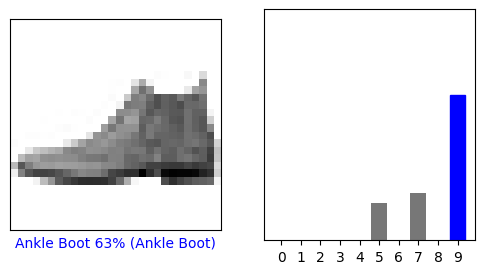

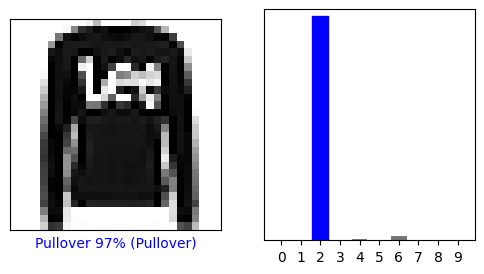

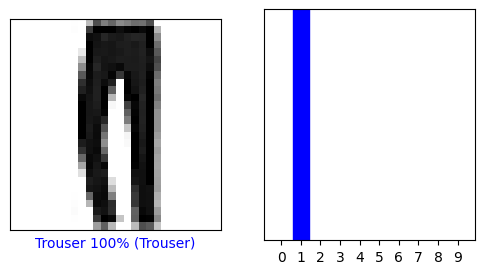

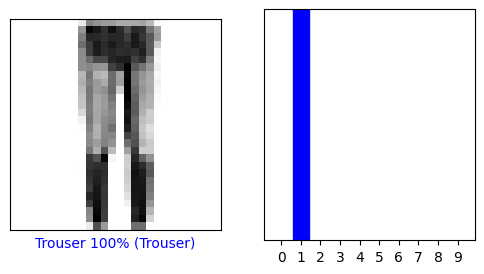

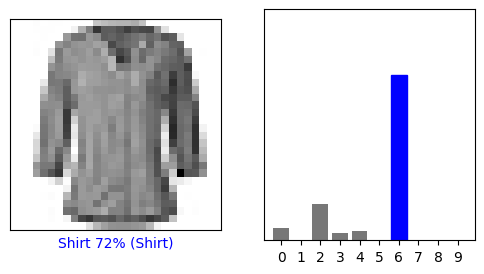

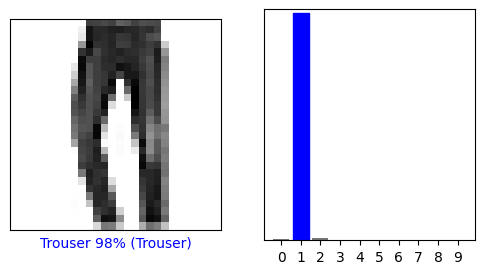

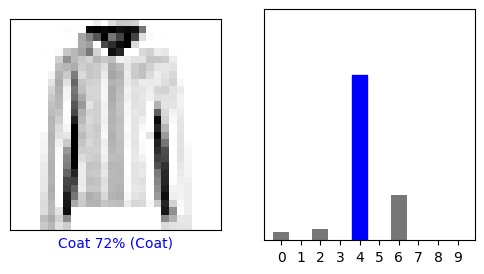

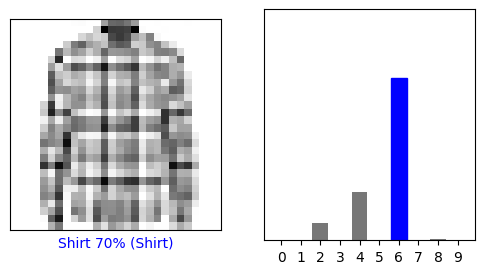

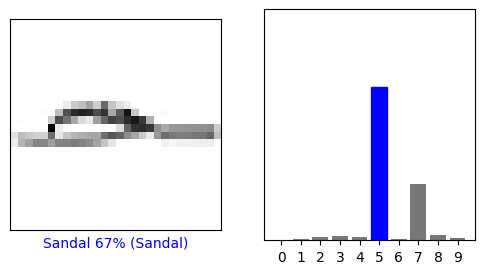

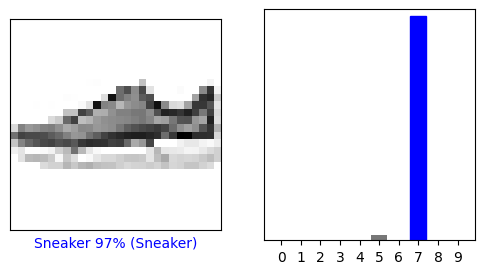

Modelo: 3


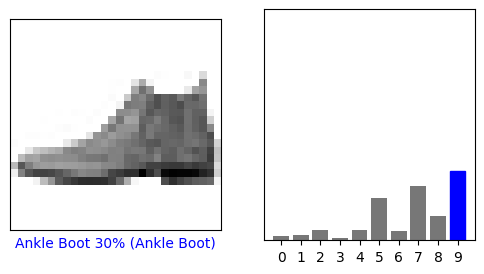

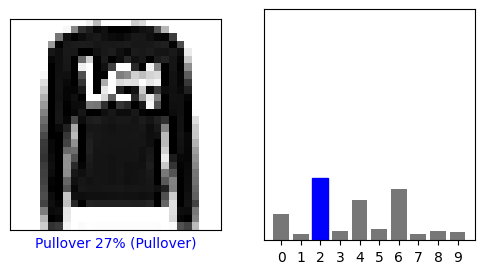

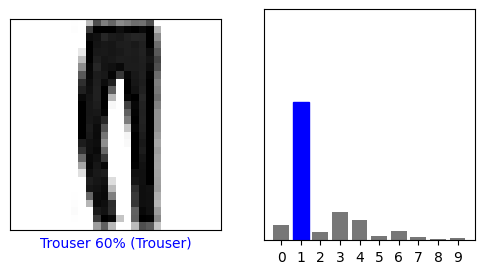

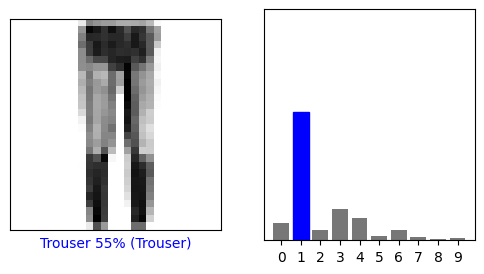

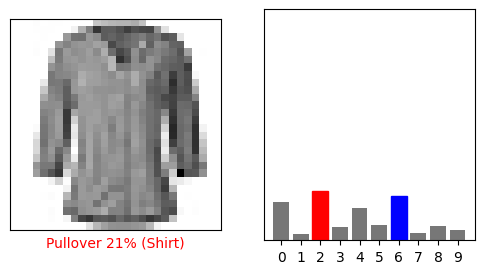

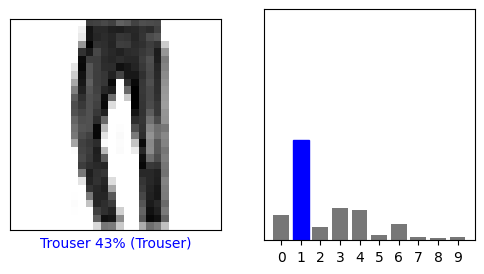

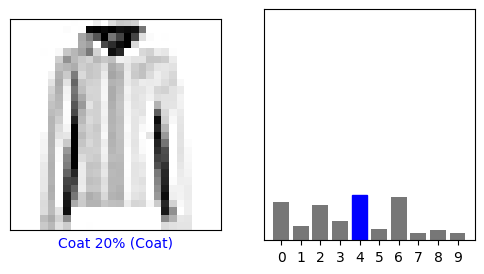

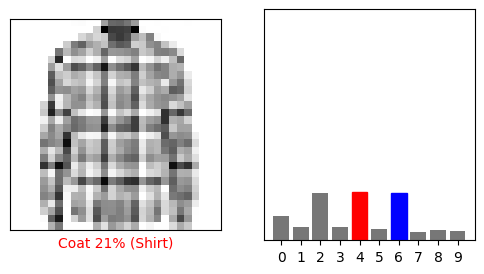

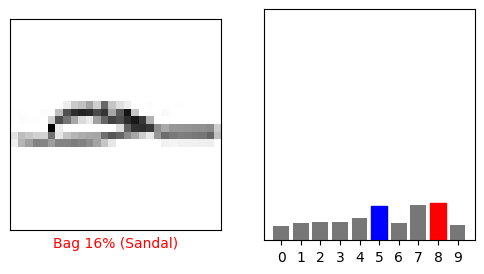

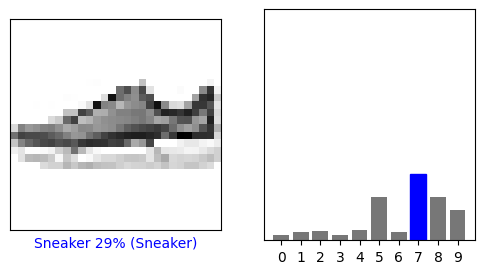

Modelo: 4


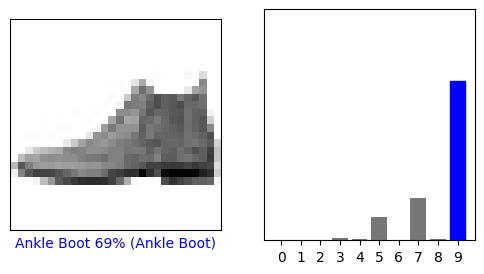

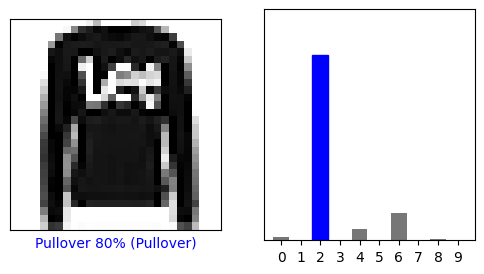

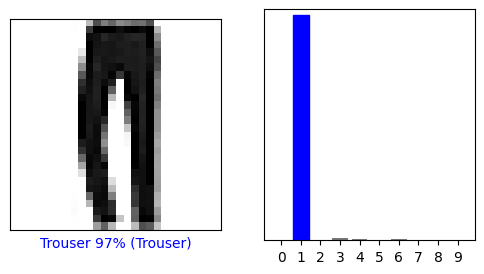

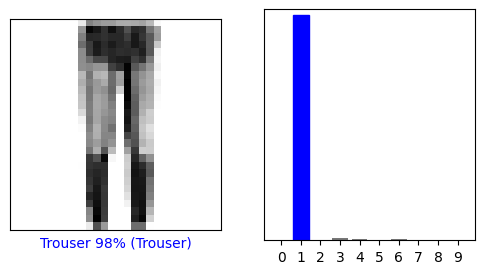

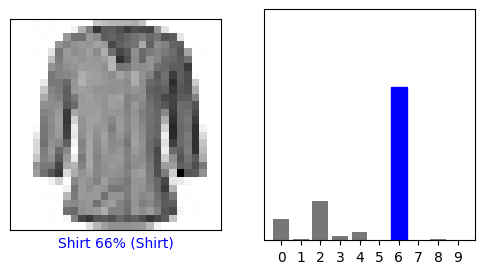

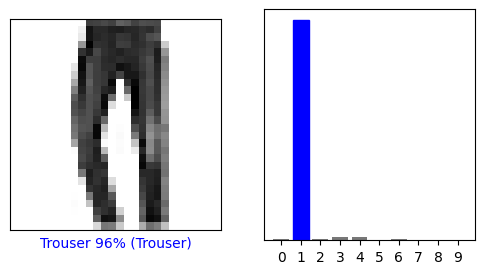

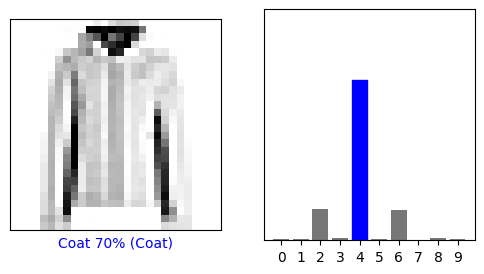

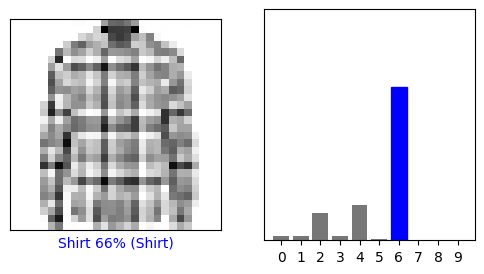

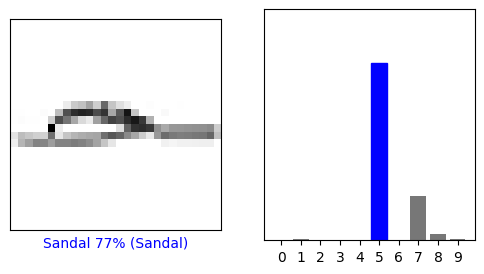

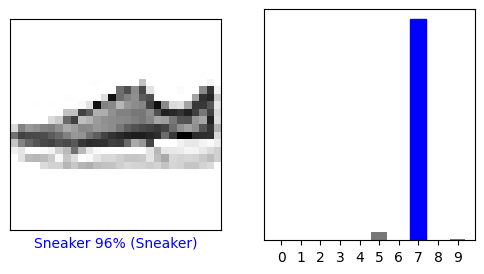

Modelo: 5


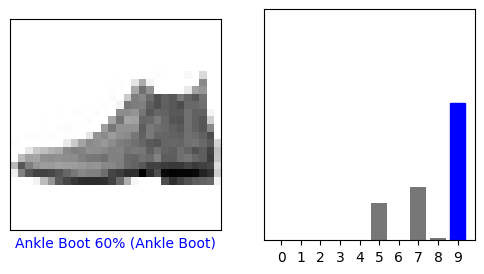

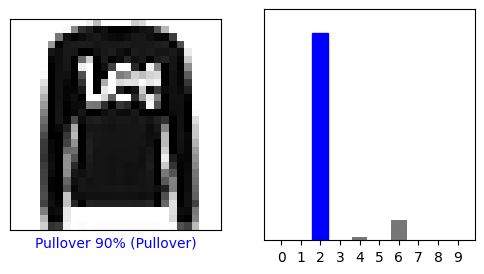

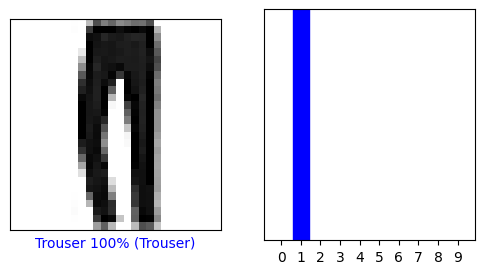

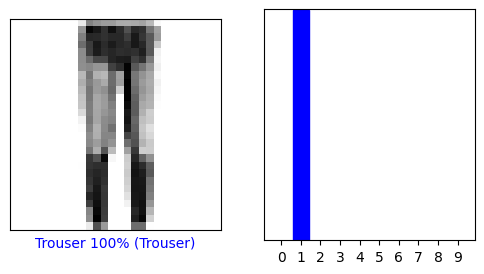

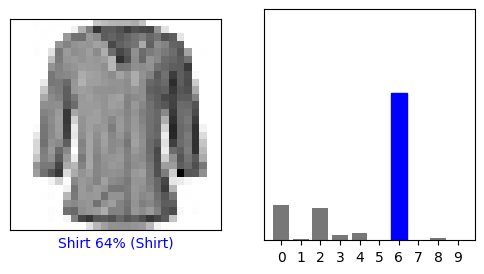

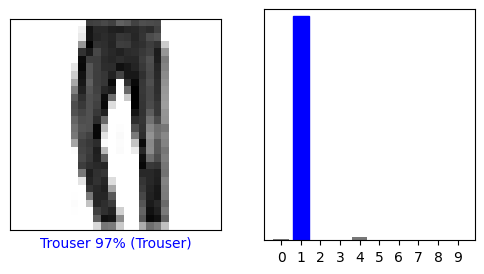

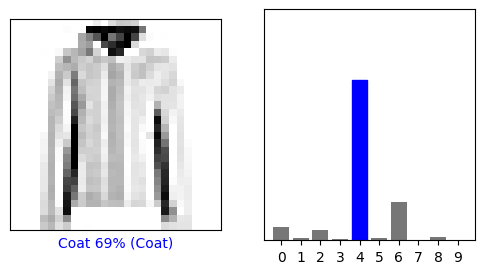

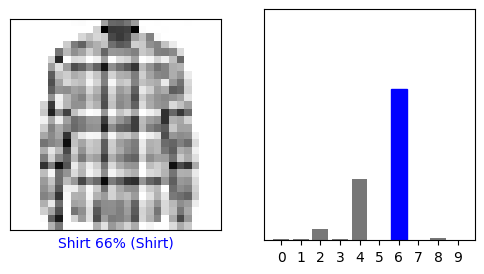

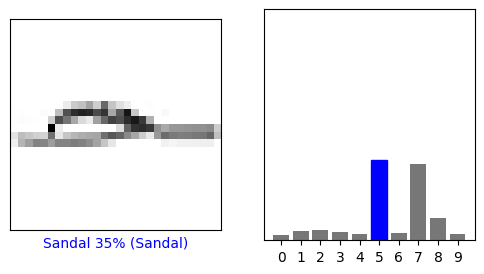

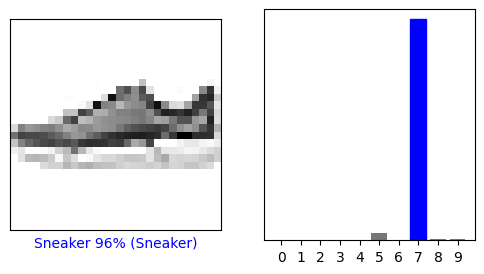

Modelo: 6


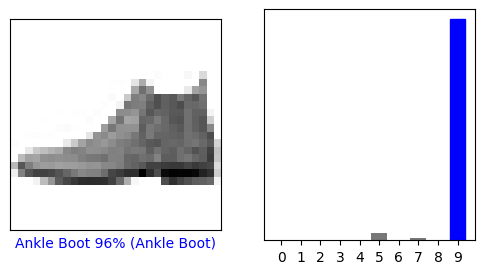

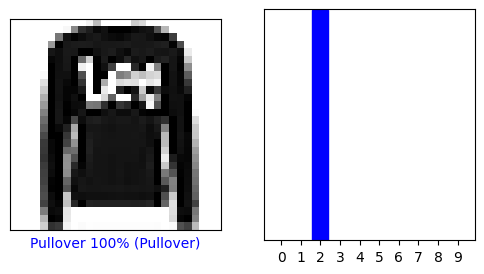

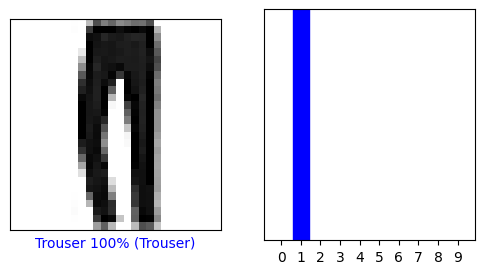

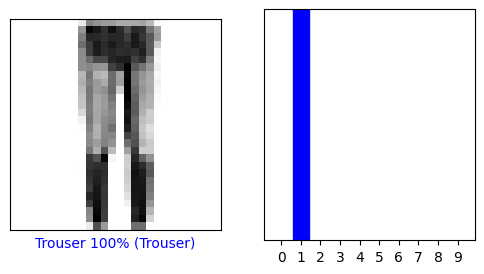

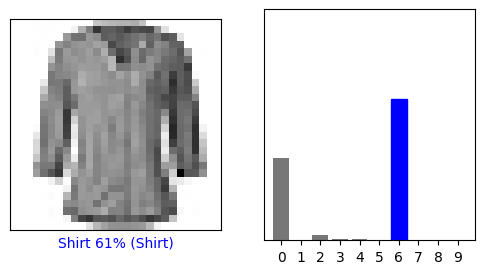

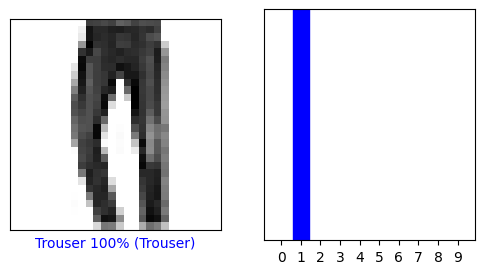

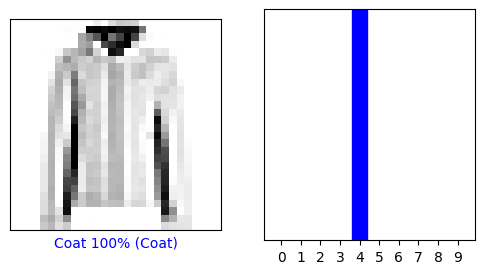

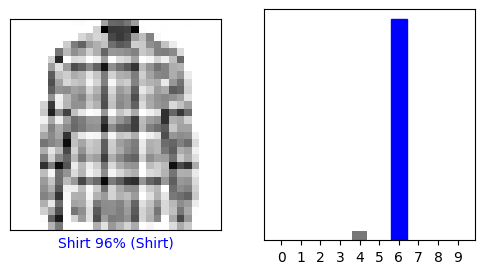

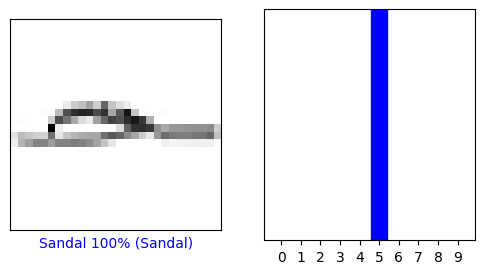

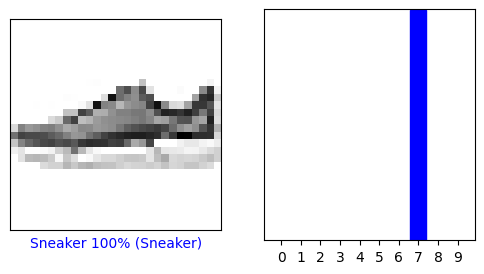

Modelo: 7


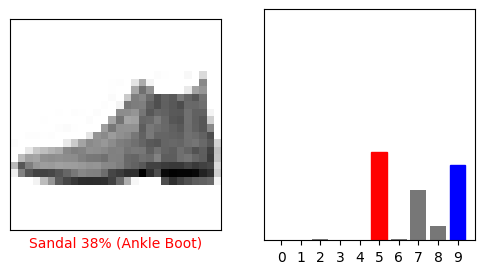

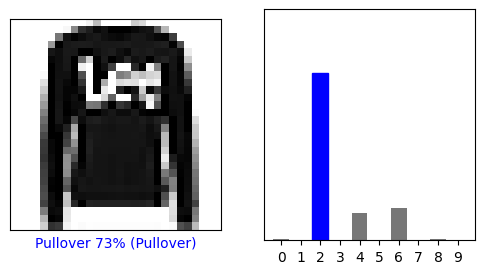

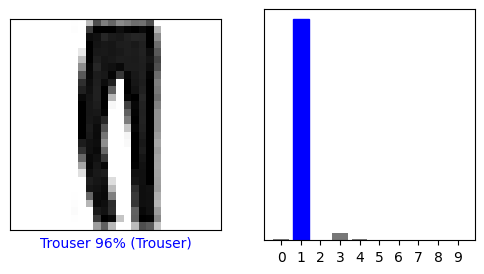

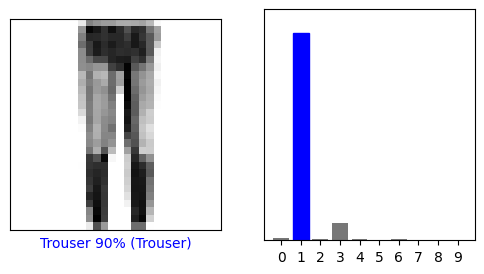

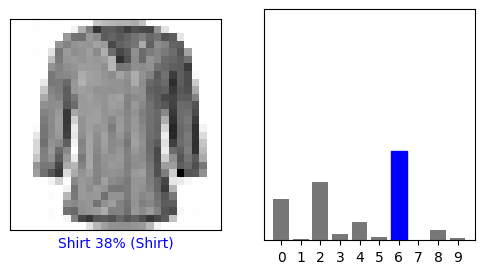

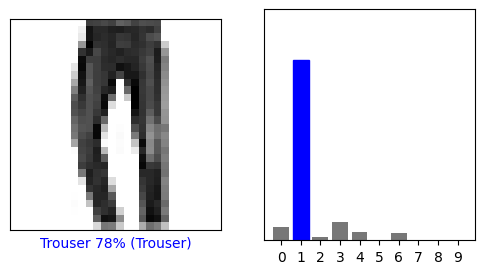

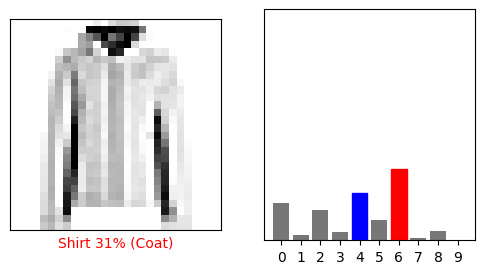

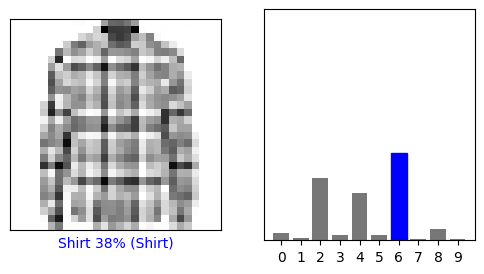

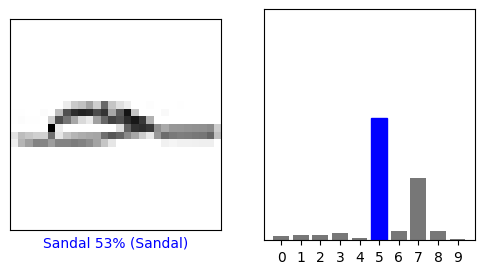

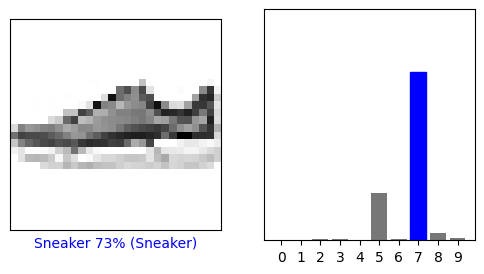

Modelo: 8


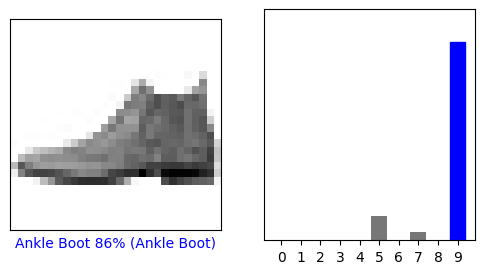

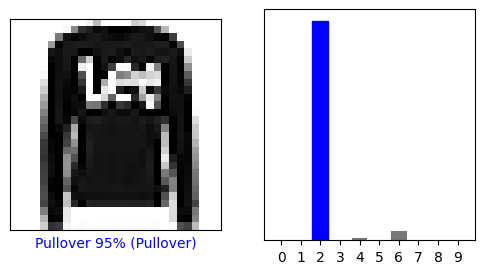

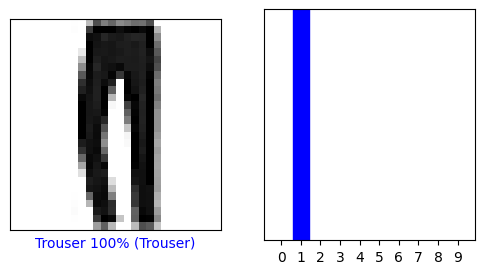

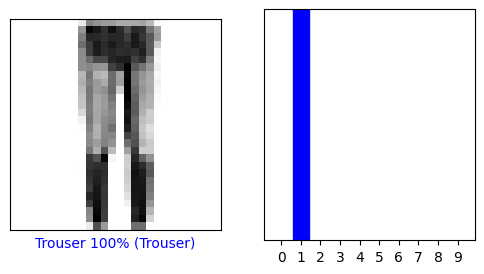

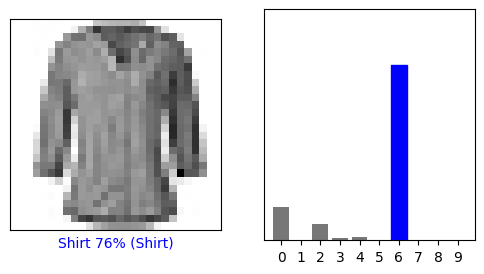

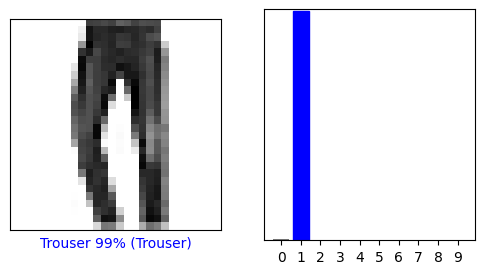

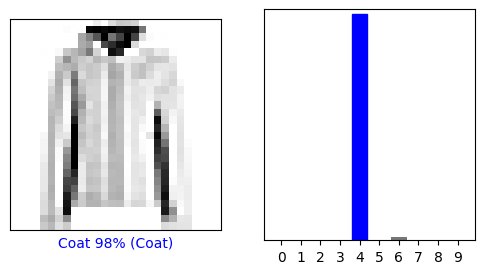

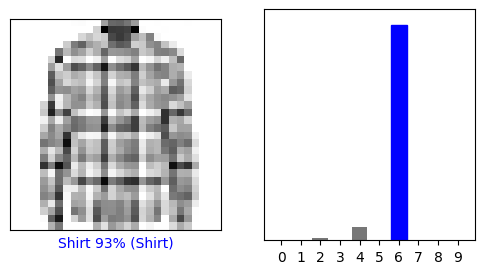

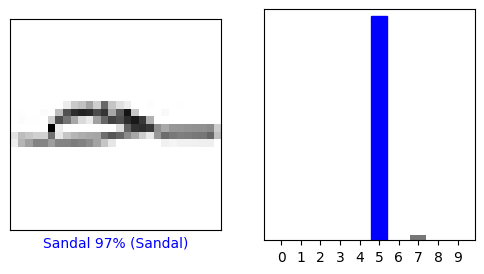

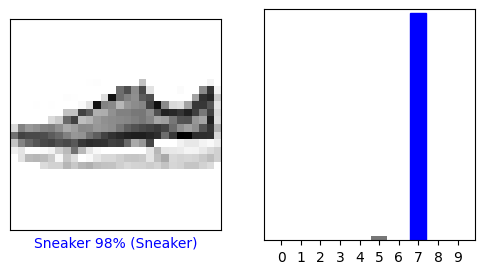

In [138]:
for j in range(8): #Modelos del 1 al 8
  print("Modelo:", j+1)
  for i in range(10): #Primeras 10 imagenes
    plt.figure(figsize = (6,3))
    plt.subplot(1,2,1)
    plot_image(i, all_predictions[j][i], test_labels, test_images,clasific)
    plt.subplot(1,2,2)
    plot_value_array(i,all_predictions[j][i], test_labels)
    plt.show()


Podemos ver q va como la mierda con las zapatillas
Los pantalones siempre los clasifica muy bien


### **PUNTO 7**
Mejora del modelo del caso 3, pero cambiando el optimizador por ‘adam’ y la función de pérdida ‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho optimizador y función de pérdida, explícalos con tus propias palabras y plantea tus reflexiones respecto al resultado.


In [139]:
#volvemos a pasar a no-categoricas las etiquetas para evitar errores
#train_labels = [np.argmax(k) for k in train_labels]
modelo = crear_Network (NNeuronasC1[2], Fa[2], 'adam','sparse_categorical_crossentropy')
modelo.summary()
modelo = entrenar(modelo, 5, train_labels)
evaluar(modelo, test_labels)


Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_54 (Flatten)        (None, 784)               0         
                                                                 
 dense_108 (Dense)           (None, 10)                7850      
                                                                 
 dense_109 (Dense)           (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 1.4898 - accuracy: 0.5936
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.8973 - accuracy: 0.7810
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6876 - accuracy: 0.8140
Epoch 4/5
469/469 

EXPLCAR PORQ ES DIFERENTE Y LO DE LAS CATEGORICAS 🚩

## CONCLUSIONES

PUES HAY Q ESCRIBIR MOVIDAS AQUI 🚩